In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-academics-dataset/Data (1).csv


In [39]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
data=pd.read_csv("/kaggle/input/students-academics-dataset/Data (1).csv")
df=data
print(df.head())



   student_id  age gender residence  preparing_for_competetive_exams  \
0           1   19      F         D                                0   
1           2   19      M         D                                0   
2           3   22      M         D                                0   
3           4   19      M         D                                1   
4           5   19      M         D                                0   

   access_to_internet  study_hrs_per_day  has_scholarship  \
0                   1                  7                0   
1                   1                  8                0   
2                   1                  3                0   
3                   0                  7                0   
4                   1                  5                0   

   extra_curricular_activities  family_financial_status  ...  father_job  \
0                            1                        4  ...           1   
1                            1                  

In [41]:
# Display basic info and statistics
print("\nDataset Info:")
df.info()
print("\nStatistical Summary:\n", df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   student_id                       100 non-null    int64 
 1   age                              100 non-null    int64 
 2   gender                           100 non-null    object
 3   residence                        100 non-null    object
 4   preparing_for_competetive_exams  100 non-null    int64 
 5   access_to_internet               100 non-null    int64 
 6   study_hrs_per_day                100 non-null    int64 
 7   has_scholarship                  100 non-null    int64 
 8   extra_curricular_activities      100 non-null    int64 
 9   family_financial_status          100 non-null    int64 
 10  health                           100 non-null    int64 
 11  location                         100 non-null    object
 12  father_education      

In [42]:

# Check for missing values
missing = df.isnull().sum()
print("\nMissing Values:\n", missing)



Missing Values:
 student_id                         0
age                                0
gender                             0
residence                          0
preparing_for_competetive_exams    0
access_to_internet                 0
study_hrs_per_day                  0
has_scholarship                    0
extra_curricular_activities        0
family_financial_status            0
health                             0
location                           0
father_education                   0
mother_education                   0
father_job                         0
mother_job                         0
alcoholic                          0
additional_tuition                 0
fam_size                           0
fam_relation                       0
prev_percent_1                     0
prev_percent_2                     0
prev_percent_3                     0
TARGET_PREDICTION_PERCENT          0
dtype: int64


In [43]:
# Print column names for verification
print("Columns in dataset:", df.columns.tolist())

# Drop irrelevant columns if present
if 'student_id' in df.columns:
    df = df.drop(columns=['student_id'], axis=1)

# Check categorical columns and adjust based on dataset
categorical_columns = ['gender', 'residence', 'location']  # Update this based on actual column names
categorical_columns = [col for col in categorical_columns if col in df.columns]

# One-hot encode categorical variables if they exist
if categorical_columns:
    df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
else:
    print("No categorical columns found for one-hot encoding.")

# Display the updated dataset
print("Dataset after preprocessing:\n", df.head())


Columns in dataset: ['student_id', 'age', 'gender', 'residence', 'preparing_for_competetive_exams', 'access_to_internet', 'study_hrs_per_day', 'has_scholarship', 'extra_curricular_activities', 'family_financial_status', 'health', 'location', 'father_education', 'mother_education', 'father_job', 'mother_job', 'alcoholic', 'additional_tuition', 'fam_size', 'fam_relation', 'prev_percent_1', 'prev_percent_2', 'prev_percent_3', 'TARGET_PREDICTION_PERCENT']
Dataset after preprocessing:
    age  preparing_for_competetive_exams  access_to_internet  \
0   19                                0                   1   
1   19                                0                   1   
2   22                                0                   1   
3   19                                1                   0   
4   19                                0                   1   

   study_hrs_per_day  has_scholarship  extra_curricular_activities  \
0                  7                0                            

In [44]:
# Define features (X) and target variable (y)
X = df.drop(columns=['TARGET_PREDICTION_PERCENT'], axis=1)
y = df['TARGET_PREDICTION_PERCENT']

In [45]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:
# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Squared Error: 4.02
R2 Score: 0.95


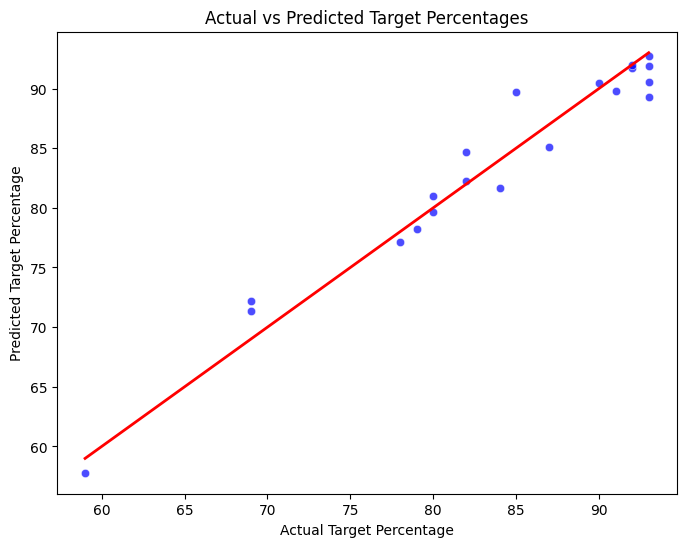

In [47]:
# Visualization: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel("Actual Target Percentage")
plt.ylabel("Predicted Target Percentage")
plt.title("Actual vs Predicted Target Percentages")
plt.show()

In [48]:
# Feature Importance Analysis
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)


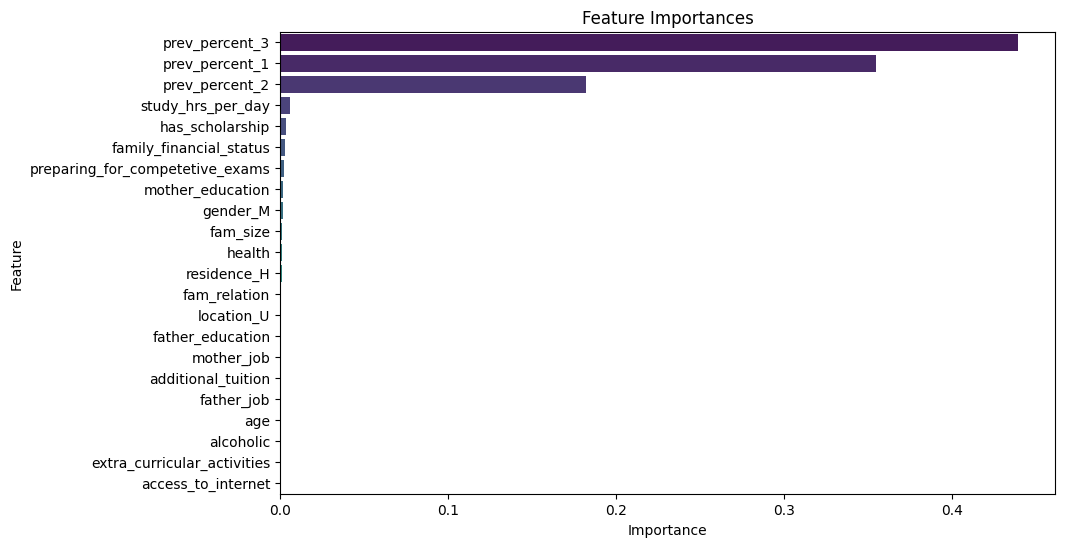

In [49]:
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")
plt.title("Feature Importances")
plt.show()